In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from statsmodels.stats.weightstats import ztest

### Ejemplo

Una empresa que distribuye un producto tiene un historial de demanda promedio de 40 unidades. No obstante, tras el reciente lanzamiento de una campaña, se han observado fluctuaciones en las ventas. La empresa quiere evaluar si la demanda promedio ha cambiado significativamente a raíz de la campaña. ¿Deberían continuar invirtiendo en la campaña?

- H0: La demanda promedio es 40 unidades.
- H1: La demanda promedio es diferente de 40 unidades.

In [2]:
# valor hipótesis nula
mu_0 = 40
sigma = 5

In [3]:
# datos de ejemplo (demandas en los últimos 100 días)
demandas = [42, 30, 41, 46, 40, 37, 39, 40, 55, 37, 43, 38, 41, 36, 36, 54,
            39, 44, 39, 38, 40, 37, 42, 40, 42, 39, 41, 43, 39, 40, 44, 41,
            36, 38, 38, 44, 37, 32, 41, 36, 40, 43, 41, 38, 42, 39, 41, 40,
            39, 38, 43, 41, 48, 42, 39, 38, 43, 40, 39, 40, 39, 43, 47, 42,
            40, 47, 41, 48, 43, 42, 38, 44, 40, 39, 36, 39, 40, 42, 41, 43,
            38, 34, 39, 40, 36, 43, 41, 37, 39, 42, 40, 38, 44, 50, 42, 49,
            50, 42, 40, 35]

# información de la muestra
n = len(demandas)
x_barra = np.mean(demandas)
s = np.std(demandas, ddof=1)

# mostrar resultados
print(f'Tamaño de la muestra: {n}')
print(f"Media muestral: {x_barra}")
print(f"Desviación estándar muestral: {s:.4f}")

Tamaño de la muestra: 100
Media muestral: 40.72
Desviación estándar muestral: 3.9545


Estadístico de prueba: 1.8207
Valor p: 0.0687
Z crítico: 1.9600


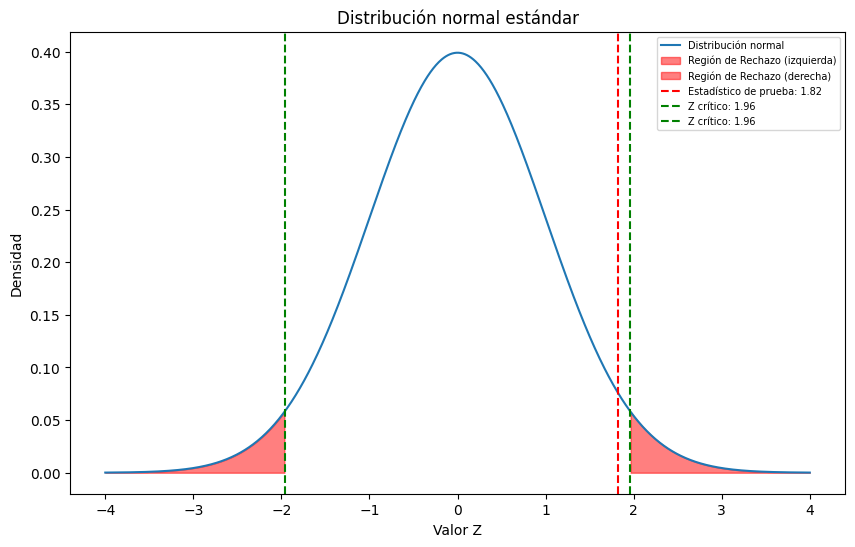

In [4]:
# calcular estadístico de prueba
z = (x_barra - mu_0) / (s / np.sqrt(n))
print(f"Estadístico de prueba: {z:.4f}")

# calcular valor p bilateral
p_valor = 2 * (1 - stats.norm.cdf(abs(z)))
print(f"Valor p: {p_valor:.4f}")

# nivel de significancia
alpha = 0.05

# z crítico
z_critico = norm.ppf(1 - alpha/2)
print(f"Z crítico: {z_critico:.4f}")

# graficar distribución normal
plt.figure(figsize=(10, 6))
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x)
plt.plot(x, y, label='Distribución normal')
plt.fill_between(x, y, where=(x <= -z_critico), color='red', alpha=0.5, label='Región de Rechazo (izquierda)')
plt.fill_between(x, y, where=(x >= z_critico), color='red', alpha=0.5, label='Región de Rechazo (derecha)')
plt.axvline(x=z, color='red', linestyle='--', label=f'Estadístico de prueba: {z:.2f}')
plt.axvline(x=z_critico, color='green', linestyle='--', label=f'Z crítico: {z_critico:.2f}')
plt.axvline(x=-z_critico, color='green', linestyle='--', label=f'Z crítico: {z_critico:.2f}')
plt.title('Distribución normal estándar')
plt.xlabel('Valor Z')
plt.ylabel('Densidad')
plt.legend(loc='upper right', fontsize=7)
plt.show()

In [5]:
# conclusión de la prueba
if p_valor < alpha:
    print("Rechazamos la hipótesis nula. La demanda promedio ha cambiado significativamente.")
else:
    print("No podemos rechazar la hipótesis nula. La demanda promedio no ha cambiado significativamente.")

No podemos rechazar la hipótesis nula. La demanda promedio no ha cambiado significativamente.


In [6]:
# mismo ejercicio con ztest
z_test, p_valor = ztest(demandas, value=mu_0, alternative='two-sided', ddof=0)
print(f"Estadístico de prueba: {z_test:.4f}")
print(f"Valor p: {p_valor:.4f}")

#conclusión de la prueba
if p_valor < alpha:
    print("Rechazamos la hipótesis nula. La demanda promedio ha cambiado significativamente.")
else:
    print("No podemos rechazar la hipótesis nula. La demanda promedio no ha cambiado significativamente.")


Estadístico de prueba: 1.8299
Valor p: 0.0673
No podemos rechazar la hipótesis nula. La demanda promedio no ha cambiado significativamente.


In [7]:
# mismo ejercicio con ztest unilateral derecha
z_test, p_valor = ztest(demandas, value=mu_0, alternative='larger', ddof=0)
print(f"Estadístico de prueba: {z_test:.4f}")
print(f"Valor p: {2*p_valor:.4f}")

# conclusión de la prueba
if p_valor < alpha:
    print("Rechazamos la hipótesis nula. La demanda promedio ha cambiado significativamente.")
else:
    print("No podemos rechazar la hipótesis nula. La demanda promedio no ha cambiado significativamente.")

Estadístico de prueba: 1.8299
Valor p: 0.0673
Rechazamos la hipótesis nula. La demanda promedio ha cambiado significativamente.


#### Correlación

In [8]:
# importar seaborn
import seaborn as sns 

In [9]:
# coeficiente de correlación de Pearson
correlacion = np.corrcoef(demandas, demandas)[0, 1]
print(f"Coeficiente de correlación de Pearson: {correlacion:.4f}")

Coeficiente de correlación de Pearson: 1.0000


In [10]:
# prueba de hipotesis para el coeficiente de correlación de Pearson

# hipótesis nula: correlación igual a cero
# hipótesis alternativa: correlación distinta de cero
correlacion = 0.85
# tamaño de la muestra
n = len(demandas)

# estadístico de prueba
t = correlacion * np.sqrt(n - 2) / np.sqrt(1 - correlacion**2)
print(f"Estadístico de prueba: {t:.4f}")


Estadístico de prueba: 15.9735


In [11]:
# con datos de housing california

# importar librerias
import pandas as pd
from sklearn.datasets import fetch_california_housing

# cargar el conjunto de datos California Housing
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)

# añadir la columna del valor medio de la casa (target)
df['MedHouseVal'] = data.target

# visualizar las primeras filas
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


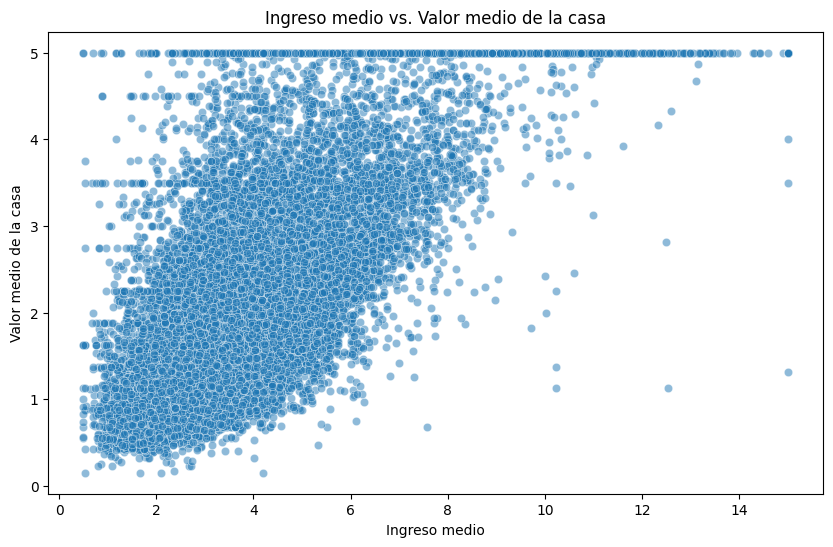

In [17]:
# diagrama de dispersión entre MedInc y MedHouseVal

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MedInc', y='MedHouseVal', alpha=0.5 m)
plt.title('Ingreso medio vs. Valor medio de la casa')
plt.xlabel('Ingreso medio')
plt.ylabel('Valor medio de la casa')
plt.show()

In [13]:
# calcular la covarianza y el coeficiente de correlación de Pearson

covarianza = np.cov(df['MedInc'], df['MedHouseVal'])[0, 1]
correlacion = np.corrcoef(df['MedInc'], df['MedHouseVal'])[0, 1]
print(f"Covarianza: {covarianza:.4f}")
print(f"Coeficiente de correlación de Pearson: {correlacion:.4f}")

Covarianza: 1.5085
Coeficiente de correlación de Pearson: 0.6881


In [14]:
# realizar prueba de hipotesis para la correlación de Pearson

# hipótesis nula: correlación igual a cero
# hipótesis alternativa: correlación distinta de cero

# tamaño de la muestra
n = len(df)

# estadístico de prueba

t = correlacion * np.sqrt(n - 2) / np.sqrt(1 - correlacion**2)
print(f"Estadístico de prueba: {t:.4f}")

# valor crítico
alpha = 0.05
t_critico = stats.t.ppf(1 - alpha/2, df=n-2)
print(f"Valor crítico: {t_critico:.4f}")

# valor p
p_valor = 2 * (1 - stats.t.cdf(abs(t), df=n-2))
print(f"Valor p: {p_valor:.4f}")

# conclusión de la prueba

if p_valor < alpha:
    print("Rechazamos la hipótesis nula. Existe una correlación significativa entre el ingreso medio y el valor medio de la casa.")
else:
    print("No podemos rechazar la hipótesis nula. No existe una correlación significativa entre el ingreso medio y el valor medio de la casa.")


Estadístico de prueba: 136.2225
Valor crítico: 1.9601
Valor p: 0.0000
Rechazamos la hipótesis nula. Existe una correlación significativa entre el ingreso medio y el valor medio de la casa.


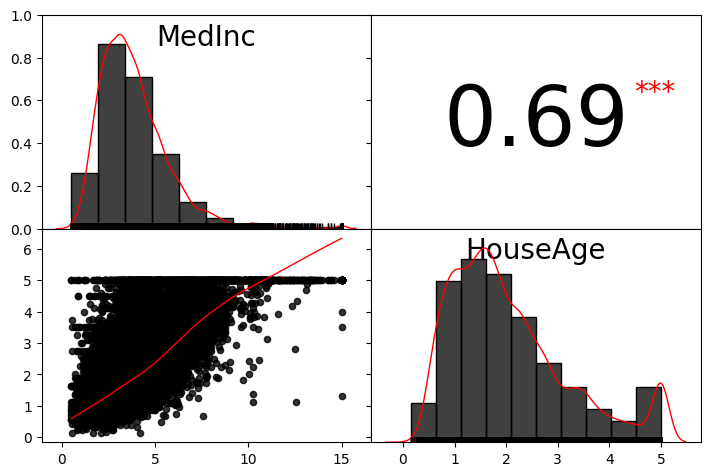

In [15]:
# matriz de dispersión

# Función para mostrar la correlación
def corrdot(x, y, **kwargs):
    corr_r = x.corr(y)
    corr_text = round(corr_r, 2)
    ax = plt.gca()
    font_size = abs(corr_r) * 80 + 5
    ax.annotate(corr_text, [.5, .5], xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

# función para mostrar estrellas de significancia
def corrfunc(x, y, **kwargs):
    r, p = stats.pearsonr(x, y)
    p_stars = ''
    if p <= 0.001:
        p_stars = '***'
    elif p <= 0.01:
        p_stars = '**'
    elif p <= 0.05:
        p_stars = '*'
    ax = plt.gca()
    ax.annotate(p_stars, xy=(0.80, 0.6), xycoords=ax.transAxes,
                color='red', fontsize=20)

# configura el PairGrid
g = sns.PairGrid(df[['MedInc', 'MedHouseVal']], aspect=1.5, diag_sharey=False, despine=False)
g.map_lower(sns.regplot, lowess=True, ci=False,
            line_kws={'color': 'red', 'lw': 1},
            scatter_kws={'color': 'black', 's': 20})
g.map_diag(sns.histplot, color='black', bins=10, stat='density')  # Cambié a 'density'
g.map_diag(sns.kdeplot, color='red', lw=1)  # Agrega KDE en el diagonal
g.map_diag(sns.rugplot, color='black')
g.map_upper(corrdot)
g.map_upper(corrfunc)
g.fig.subplots_adjust(wspace=0, hspace=0)

# eliminar etiquetas de los ejes
for ax in g.axes.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')

# añadir títulos a los ejes diagonales
for ax, col in zip(np.diag(g.axes), df.columns):
    ax.set_title(col, y=0.82, fontsize=20)

plt.show()


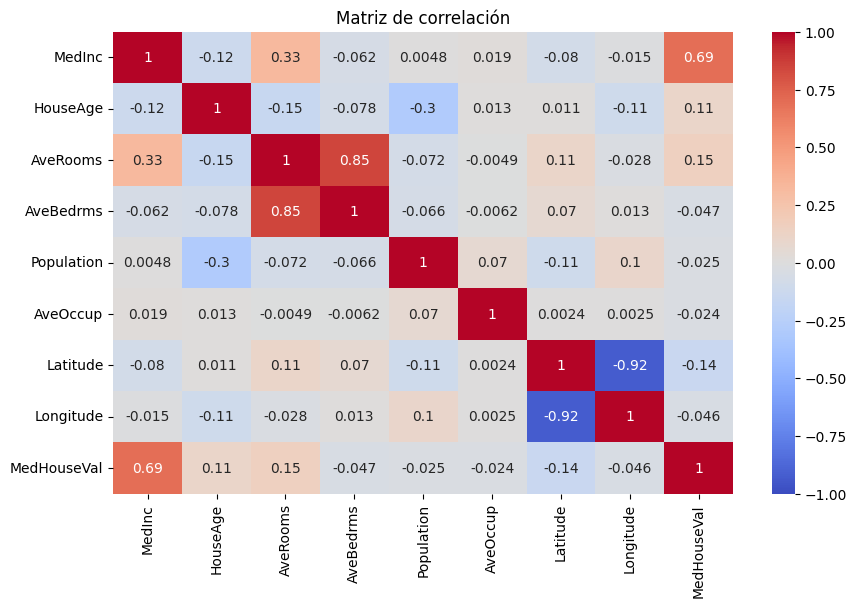

In [16]:
# graficar matriz de correlación en todas las variables numéricas

# calcular la matriz de correlación
correlaciones = df.corr()

# graficar la matriz de correlación

plt.figure(figsize=(10, 6))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación')
plt.show()